In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Распределение Лапласа

*Распределе́ние Лапла́са* (двойно́е экспоненциа́льное) — в теории вероятностей это непрерывное распределение случайной величины, при котором плотность вероятности есть

$f(x)=\frac{\alpha}{2}\,e^{-\alpha|x-\mu|}, -\infty<x<+\infty,$

где $\alpha>0$ — параметр масштаба, $-\infty<\mu<+\infty$— параметр сдвига.

В библиотеке scipy доступно *scipy.stats.laplace*, где масштаб задается как *scale*, и сдвиг - *loc*.

Сгенерируем выборку объёма 1000 из распределения Лапласа с параметрами *loc*=0 и *scale*=1:

In [97]:
loc, scale = 0, 1
laplace_rv = sts.laplace(loc, scale)
sample = laplace_rv.rvs(1000)

Построим гистограмму нашей выборки и нарисуем поверх нее теоретическую плотность распределения нашей случайной величины:

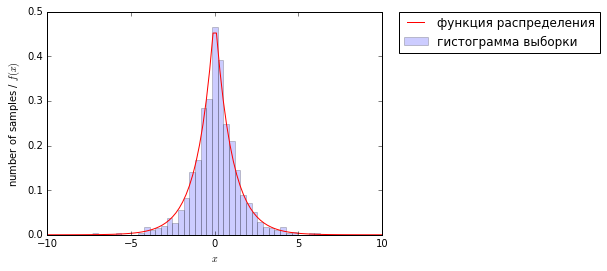

In [98]:
plt.hist(sample, bins=40, normed=True, label=u'гистограмма выборки', alpha=0.2)
plt.ylabel('number of samples / $f(x)$')
plt.xlabel('$x$')

x = np.linspace(-10,10,100)
pdf = laplace_rv.pdf(x)
plt.plot(x, pdf, label=u'функция распределения', alpha=1, color='red')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Для нескольких значений n (5, 10, 50, 100) сгенерируем 1000 выборок объёма n и построим гистограммы распределений их выборочных средних. Положим $\mu=0$ и $\alpha=1$.

Теоретические среднее и дисперсия распределения Лапласа равны $\mu$, и $\frac{2}{\alpha^{2}}\,$. По центральной предельной теореме получаем, что распределение выборочных средних будет близко к нормальному распределению с параметрами $\mu$ и $\sigma^2=\frac{\frac{2}{\alpha^{2}}}{n}=\frac{2}{\alpha^{2}n}$, где n - размер выборки.

Поверх гистограмм распределений выборочных средних сгенерированных выборок построим график нормального расрпеделения с расчитанными параметрами.

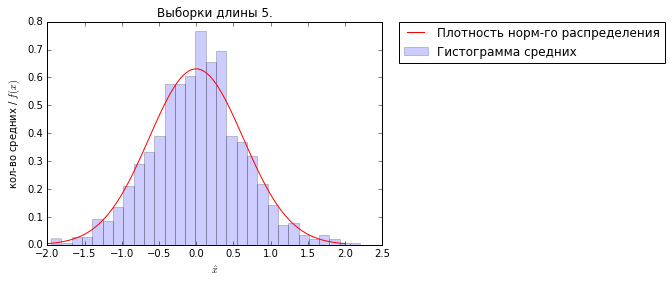

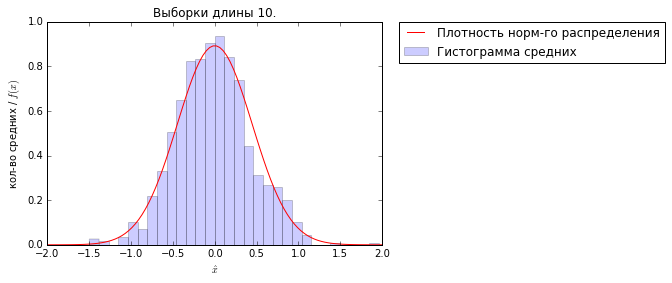

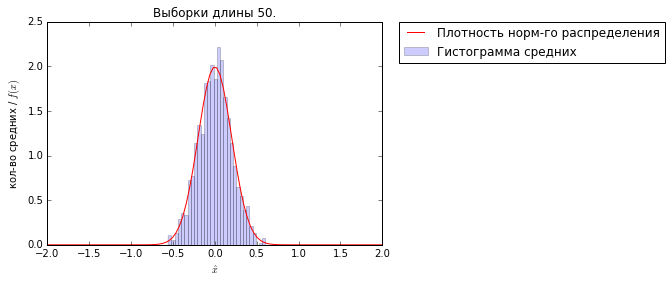

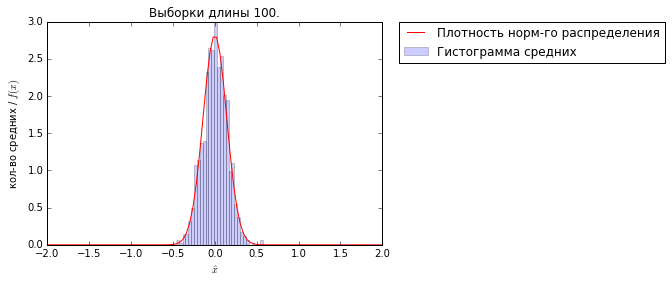

In [99]:
# параметры распределения
loc, scale = 0, 1

rv = sts.laplace(loc, scale)

for n in [5,10,50,100]:
    
    # делаем 1000 выборок длины n и считаем их среднее
    means = []
    for j in range(0,1000):
        sample = rv.rvs(n)
        means.append(np.mean(sample))
        
    # строим гистограмму распределений выборочных средних
    plt.hist(means, bins=30, normed=True, label=u'Гистограмма средних', alpha=0.2)

    # строим нормально распределение с подсчитанными параметрами
    # берем корень из рассчитаной дисперсии, т.к. в функцию norm
    # нужно передать стандартное квадратичное отклонение
    norm_rv = sts.norm(loc,np.sqrt(2.0/((scale**2)*n)))
    x = np.linspace(-2,2,100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label=u'Плотность норм-го распределения', alpha=1, color='red')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)    
    plt.ylabel(u'кол-во средних / $f(x)$')
    plt.xlabel('$\hat{x}$')
    plt.title(u'Выборки длины {0}.'.format(n))
    plt.show()

## Выводы

Итак, мы получили четыре графика, на которых изображены гистограммы распределений выборочных средних для 1000 выборок с размерами 5, 10, 50 и 100. Послкольку для каждого n мы делали по 1000 различных выборок, то даже для выборок размера 5, соответствующее нормальное распределение хорошо описывает распределение средних. По мере роста n, мы видим , что гистограмма распределения все более сглаживается, и для n=100 практически аккуратно закрашивает область под графиком нормально распределения.